# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [3]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/Users/taylo/Downloads/envanalysis/assignment-5/data/tidal_wetland_estuaries.csv')

df = df.replace(-9999, np.NaN)

In [4]:
df_east = df.loc[(df['coast'] == 'EAST')]

df_west = df.loc[(df['coast'] == 'WEST')]

stats.ttest_ind(df_east['soc_density'], df_west['soc_density'], alternative='greater', nan_policy = 'omit')

Ttest_indResult(statistic=8.45031778669312, pvalue=5.765284478012742e-13)

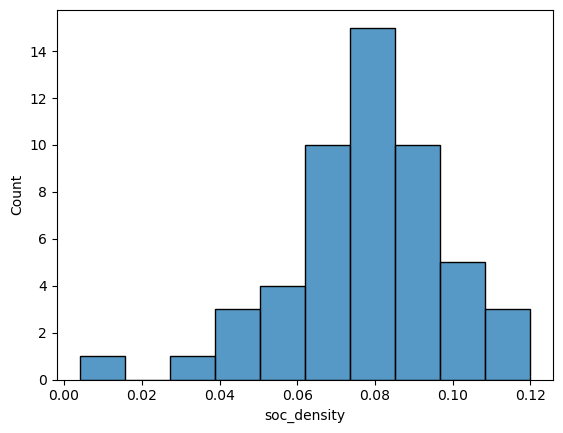

In [5]:
sns.histplot(df_east['soc_density'])
plt.show()

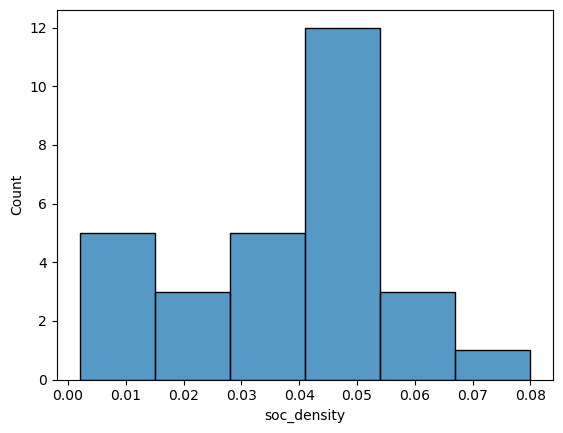

In [78]:
sns.histplot(df_west['soc_density'])
plt.show()

In [79]:
df_east['soc_density'].describe()

count    52.000000
mean      0.077577
std       0.021260
min       0.004000
25%       0.067750
50%       0.077000
75%       0.091750
max       0.120000
Name: soc_density, dtype: float64

In [80]:
df_west['soc_density'].describe()

count    29.000000
mean      0.037793
std       0.018467
min       0.002000
25%       0.024000
50%       0.044000
75%       0.051000
max       0.080000
Name: soc_density, dtype: float64

## Interpretation:

The two-sample t-test is statistically significant because the pvalue is so small, so we can reject the null hypothesis. Thus, we can accept the alternative hypothesis that east coast soil organic carbon density is greater than west coast soil organic carbon density.

I used the two-sample t-test because I wanted to check if the true means of the two groups were different from each other (specifically if one was greater than another).

I would argue that the data is a normal distribution based off how the histograms look and how close the median/means for each population are to each other respectively.

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [6]:
from utils import Linear_Reg_Diagnostic # do not change!
import statsmodels.formula.api as smf

In [7]:
df = df.replace(-9999.000000, np.NaN)

df.columns

Index(['name', 'coast', 'estu_latitude', 'estu_longintude', 'estu_dep',
       'estu_perim', 'land_area', 'land_latitude', 'land_longitude',
       'population', 'tide_ht', 'estu_salinity', 'ocean_salinity_mean',
       'air_temp_mean', 'frost_days_per_yr', 'ocean_sst_mean',
       'ocean_diss_inorg_p', 'ocean_no3', 'tide_flow', 'mean_precip',
       'mean_temp', 'soc_density'],
      dtype='object')

In [8]:
model3 = smf.ols(formula='Q("ocean_salinity_mean") ~ ocean_sst_mean + mean_precip + tide_ht', data=df).fit()

idk3 = Linear_Reg_Diagnostic(model3)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("ocean_salinity_mean")   R-squared:                       0.817
Model:                                  OLS   Adj. R-squared:                  0.812
Method:                       Least Squares   F-statistic:                     163.7
Date:                      Sun, 07 May 2023   Prob (F-statistic):           2.08e-40
Time:                              11:07:20   Log-Likelihood:                -120.55
No. Observations:                       114   AIC:                             249.1
Df Residuals:                           110   BIC:                             260.0
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.3624      0.391     77.629      0.000      29.587      31.138
ocean_sst_mean     0.2351      0.014     17.265      0.000       0.208       0.262
mean_precip       -0.0010      0.000     -7.120      0.000      -0.001      -0.001
tide_ht            0.2414      0.090      2.696      0.008       0.064       0.419
==============================================================================
Omnibus:                        5.703   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.707
Skew:                          -0.547   Prob(JB):                       0.0577
Kurtosis:                       2.924   Cond. No.                     8.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
idk3.vif_table()

         Features  VIF Factor
2     mean_precip        1.01
3         tide_ht        1.67
1  ocean_sst_mean        1.68
0       Intercept       34.67


## Interpretation:

The high R-squared values (regular and adjusted) suggest that a large proportion of the variance in the dependent variable (mean ocean salinity) can be accounted for by the independent variables in the model (mean ocean sst, mean precipitation, tide ht, ocean no3). Specifically, 81.8%, based off the R-Squared value of 0.818, because it is a proportion out of 1.0

The coefficients indicate how much mean ocean salinity will increase/decrease for every one unit increase of each independent variable respectively.

The p values for the coefficients are significant and the VIF values are all under 5.0



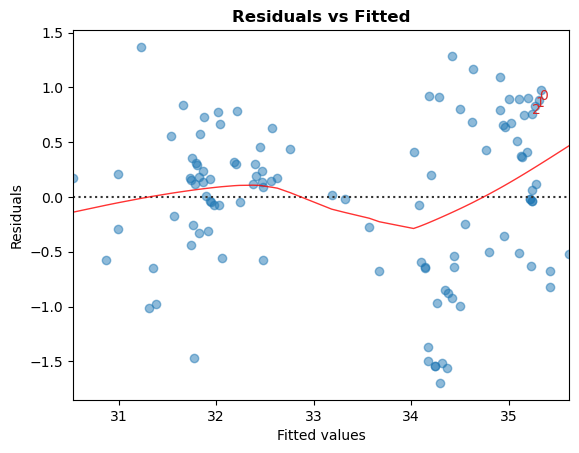

In [94]:
idk3.residual_plot();

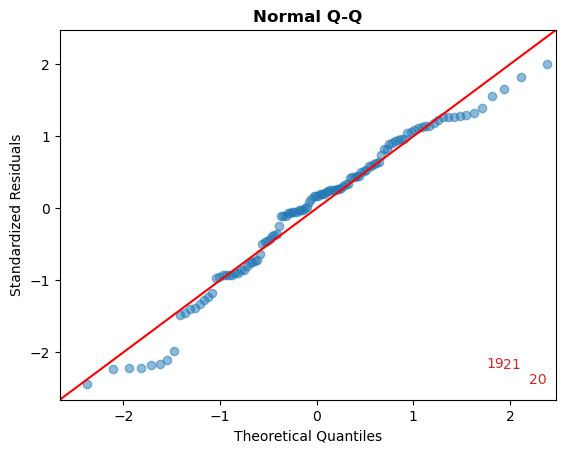

In [95]:
idk3.qq_plot();

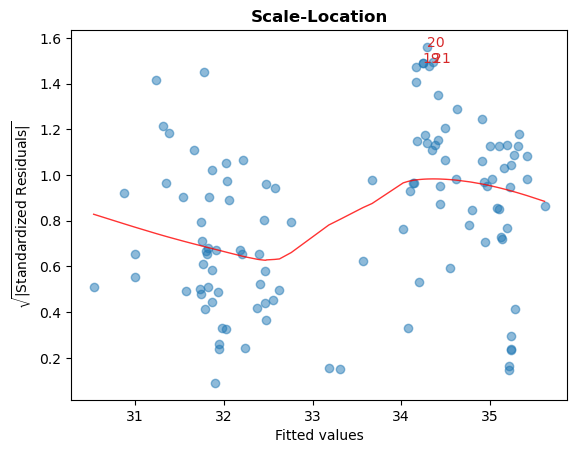

In [96]:
idk3.scale_location_plot();

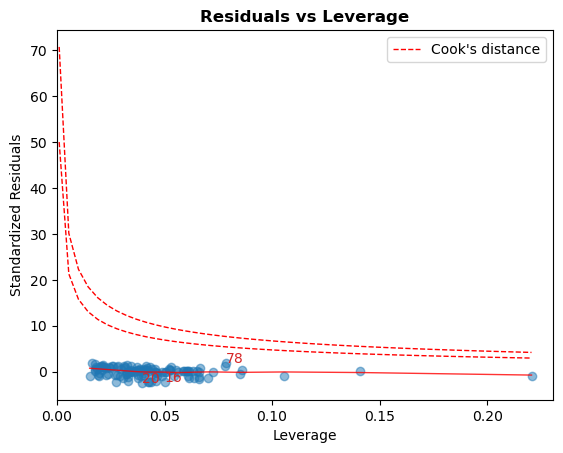

In [97]:
idk3.leverage_plot();

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [10]:
df_coal = pd.read_csv('C:/Users/taylo/Downloads/envanalysis/assignment-5/data/coal-production.csv')


In [11]:
df_coal['year'] = pd.to_datetime(df_coal['year'], format='%Y')

df_coal = df_coal.set_index('year')

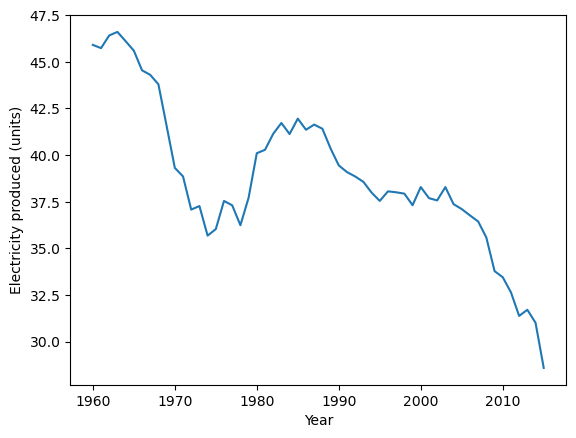

In [12]:
fig, ax = plt.subplots()
ax.plot(df_coal['electricity_prod'])
ax.set_xlabel('Year')
ax.set_ylabel('Electricity produced (units)');


## Trend

There appears to be a downward trend in electricity produced using coal in high-income countries, however it was not linear as after a significant decrease in the first ten years of the data, it the amount rebounded over the next twenty years, before continuing to decline even more

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

adf_print(df_coal)

ADF Statistic: 1.8721544326758233
p-value: 0.9984818799941668


## Stationarity

Due to the large p-value in the ADF test, we must accept the null hypothesis that the time series is not stationary, and we can conclude that there is a trend in the data

In [15]:
from pmdarima import auto_arima 

auto_arima_model = auto_arima(df_coal['electricity_prod'])

auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Sun, 07 May 2023   AIC                            149.368
Time:                        11:07:54   BIC                            155.390
Sample:                             0   HQIC                           151.697
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA summary

The best ARIMA model according to the auto-Arima function was the (1,1,1) model, or 1 lag observation, 1 degree of differencing, and the size of the moving average being 1

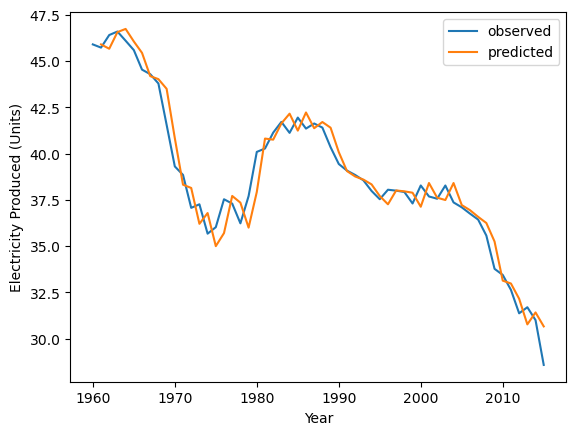

In [39]:
in_samp_pred = auto_arima_model.predict_in_sample()

fig, ax = plt.subplots()
ax.plot(df_coal, label='observed')
ax.plot(df_coal.index[1:], in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced (Units)')
ax.legend();

In [24]:
from statsmodels.tsa.arima.model import ARIMA

arima_111 = ARIMA(df_coal, order = (1,1,1)).fit()


c:\Users\taylo\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\taylo\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


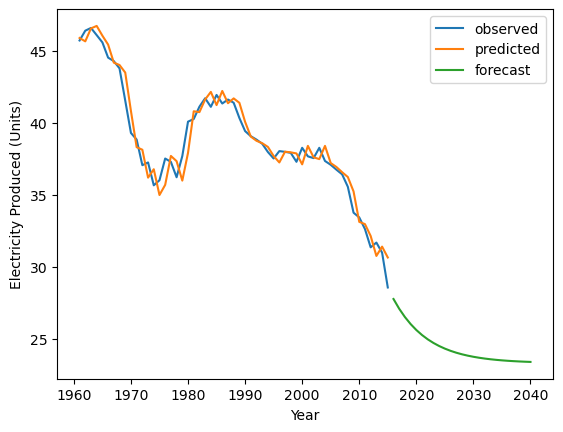

In [38]:
forecast = arima_111.forecast(25)

fig, ax = plt.subplots()
ax.plot(df_coal[1:], label='observed')
ax.plot(df_coal.index[1:], in_samp_pred[1:], label='predicted')
ax.plot(forecast, label='forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced (Units)')
ax.legend();